## EDA - Análisis Exploratorio de Datos 

El Análisis Exploratorio de Datos (EDA) se realiza como el primer paso fundamental en el proceso de análisis de datos. Su propósito principal es brindar una comprensión profunda y contextualizada del conjunto de datos en cuestión. Esta exploración inicial tiene como objetivo obtener información detallada antes de aplicar técnicas más avanzadas de modelado y análisis.

In [1]:
# Importando librerías
import pandas as pd                                 # Librería para manipular datasets
import seaborn as sns                               # Librería para visualización de datos
import matplotlib.pyplot as plt                     # Librería de trazado de gráficos en 2D

### **Ingesta de Datos**

In [2]:
import pandas as pd
cuenta = pd.read_csv("../Data/account_activity.csv")
cliente = pd.read_csv("../Data/customer_data.csv")
fraude = pd.read_csv("../Data/fraud_indicators.csv")
clienteSospechoso = pd.read_csv("../Data/suspicious_activity.csv")
comerciante = pd.read_csv("../Data/merchant_data.csv")
tran_cat = pd.read_csv("../Data/transaction_category_labels.csv")
tran_cantidad = pd.read_csv("../Data/amount_data.csv")
anomalia = pd.read_csv("../Data/anomaly_scores.csv")
tran_data = pd.read_csv("../Data/transaction_metadata.csv")
tran_historial = pd.read_csv("../Data/transaction_records.csv")

Creamos esta lista para organizar y estructurar los datos relacionados con el análisis de transacciones financieras en un formato fácilmente accesible para su posterior manipulación y análisis.

In [3]:
data = [cuenta, cliente, fraude, clienteSospechoso, comerciante, tran_cat, tran_cantidad, anomalia, tran_data, tran_historial]

### **Exploración de Datos**

In [4]:
# Visualizamos información
for df in data:
    print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   AccountBalance  1000 non-null   float64
 2   LastLogin       1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  1000 non-null   int64 
 1   Name        1000 non-null   object
 2   Age         1000 non-null   int64 
 3   Address     1000 non-null   object
dtypes: int64(2), object(2)
memory usage: 31.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Trans

In [5]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [6]:
# Se realiza una fusión de los DataFrames "cliente" y "cuenta" sobre la columna 'CustomerID', creando un nuevo DataFrame llamado "cuentaCliente
cuentaCliente = pd.merge(cliente, cuenta, on='CustomerID')
cuentaCliente

,CustomerID,Name,Age,Address,AccountBalance,LastLogin
0,1001,Customer 1001,54,Address 1001,9507.272060,2022-01-01
1,1002,Customer 1002,35,Address 1002,7408.704536,2022-01-02
2,1003,Customer 1003,40,Address 1003,1715.321989,2022-01-03
3,1004,Customer 1004,30,Address 1004,3101.509134,2022-01-04
4,1005,Customer 1005,46,Address 1005,5405.766914,2022-01-05
...,...,...,...,...,...,...
995,1996,Customer 1996,33,Address 1996,8523.485163,2024-09-22
996,1997,Customer 1997,58,Address 1997,9255.451757,2024-09-23
997,1998,Customer 1998,25,Address 1998,9148.652759,2024-09-24
998,1999,Customer 1999,57,Address 1999,7376.854107,2024-09-25


In [7]:
# Se realiza otra fusión con el DataFrame "clienteSospechoso" sobre 'CustomerID', creando el DataFrame "cuentaClienteSos

cuentaClienteSos = pd.merge(cuentaCliente, clienteSospechoso, on='CustomerID')
cuentaClienteSos

cantClientesSos = cuentaClienteSos.groupby('SuspiciousFlag')['CustomerID'].count()
cantClientesSos


SuspiciousFlag
0    977
1     23
Name: CustomerID, dtype: int64

### Análisis y Visualización

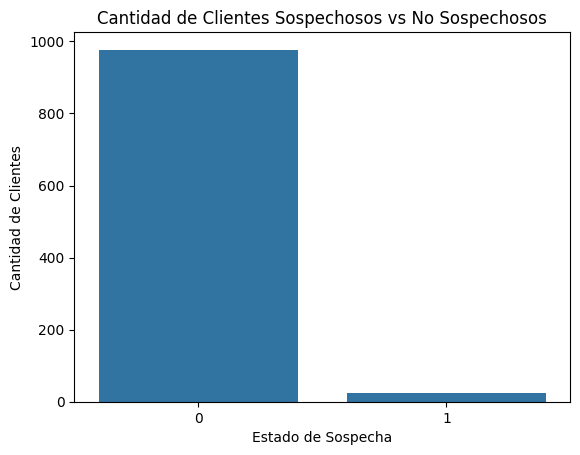

In [8]:
# Se calcula y visualiza la cantidad de clientes sospechosos y no sospechosos
sns.barplot(x=cantClientesSos.index, y=cantClientesSos.values)

plt.xlabel('Estado de Sospecha')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Clientes Sospechosos vs No Sospechosos')

plt.show()


C:\Users\Markitos\AppData\Local\Temp\ipykernel_2864\498566249.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clientes_por_edad = cuentaClienteSos.groupby(['RangoEdad', 'SuspiciousFlag']).size().unstack(fill_value=0)


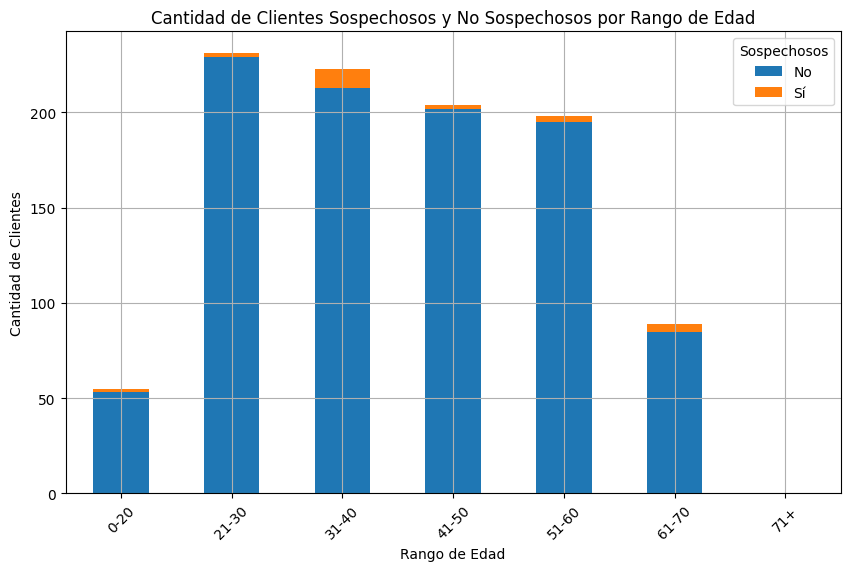

In [9]:
rangos_edad = [0, 20, 30, 40, 50, 60, 70, 100]

etiqueta_edad = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

cuentaClienteSos['RangoEdad'] = pd.cut(cuentaClienteSos['Age'], bins=rangos_edad, labels=etiqueta_edad, right=False)

clientes_por_edad = cuentaClienteSos.groupby(['RangoEdad', 'SuspiciousFlag']).size().unstack(fill_value=0)

clientes_por_edad.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Clientes')
plt.title('Cantidad de Clientes Sospechosos y No Sospechosos por Rango de Edad')
plt.legend(title='Sospechosos', labels=['No', 'Sí'])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [10]:
clienteEstado = clienteSospechoso['SuspiciousFlag'].value_counts()
clienteEstado

SuspiciousFlag
0    977
1     23
Name: count, dtype: int64

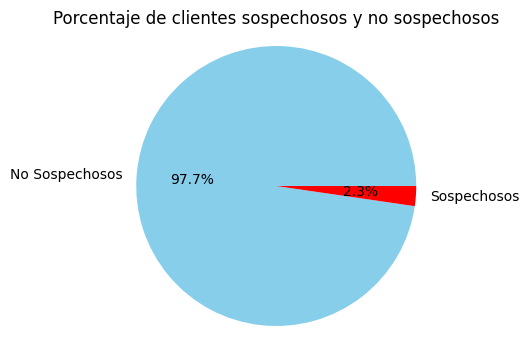

In [11]:
# Se crea un gráfico circular para mostrar el porcentaje de clientes sospechosos y no sospechosos.
clienteEstado = clienteSospechoso['SuspiciousFlag'].value_counts()

plt.figure(figsize=(6, 4))
clienteEstado.plot(kind='pie', autopct='%1.1f%%', labels=['No Sospechosos', 'Sospechosos'], colors=['skyblue', 'red'])
plt.title('Porcentaje de clientes sospechosos y no sospechosos')
plt.ylabel('')
plt.axis('equal') 
plt.show()


Se calcula y visualiza la cantidad de transacciones fraudulentas.

In [12]:
cantFraudes = fraude['FraudIndicator'].value_counts()
cantFraudes

FraudIndicator
0    955
1     45
Name: count, dtype: int64

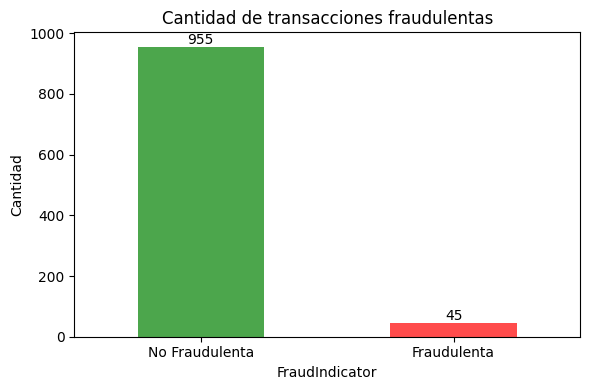

In [13]:
# Se calcula y visualiza la cantidad de transacciones fraudulentas
conteo_fraudes = fraude['FraudIndicator'].value_counts()

plt.figure(figsize=(6, 4))
bars = conteo_fraudes.plot(kind='bar', color=['green', 'red'], alpha=0.7)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f'{int(bar.get_height())}',
             ha='center', va='bottom')

plt.title('Cantidad de transacciones fraudulentas')
plt.xlabel('FraudIndicator')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['No Fraudulenta', 'Fraudulenta'], rotation=0)

plt.tight_layout()
plt.show()

Se calcula la cantidad de transacciones por categoría y se muestra en un DataFrame df

In [14]:
df = tran_cat['Category'].value_counts()
df

Category
Other     210
Food      204
Travel    198
Online    196
Retail    192
Name: count, dtype: int64

Se fusionan los DataFrames tran_cat y fraude utilizando 'TransactionID' y se agrupa por categoría y fraudulencia. La cantidad de fraudes y no fraudes por categoría se almacena en cantFraudeCategoria

In [15]:
fraudeCategoria = pd.merge(tran_cat, fraude, on='TransactionID')
cantFraudeCategoria = fraudeCategoria.groupby('Category')['FraudIndicator'].value_counts()
cantFraudeCategoria

Category  FraudIndicator
Food      0                 195
          1                   9
Online    0                 186
          1                  10
Other     0                 200
          1                  10
Retail    0                 183
          1                   9
Travel    0                 191
          1                   7
Name: count, dtype: int64

C:\Users\Markitos\AppData\Local\Temp\ipykernel_2864\1372364109.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  paleta = plt.cm.get_cmap('Set3')


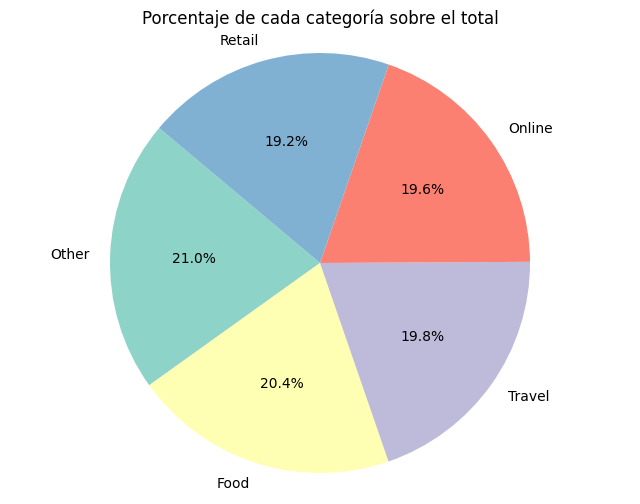

Category
Other     210
Food      204
Travel    198
Online    196
Retail    192
Name: count, dtype: int64

In [16]:
# Se calcula el total de transacciones y la cantidad de transacciones por categoría
cantCategoria = len(tran_cat)
totalPorCategoria = tran_cat['Category'].value_counts()

porcentaje_por_categoria = (totalPorCategoria / cantCategoria) * 100
paleta = plt.cm.get_cmap('Set3')
plt.figure(figsize=(8, 6))
plt.pie(porcentaje_por_categoria, labels=porcentaje_por_categoria.index, autopct='%1.1f%%', startangle=140, colors=paleta.colors)
plt.title('Porcentaje de cada categoría sobre el total')
plt.axis('equal')  
plt.show()
totalPorCategoria

### Análisis de Categorías de Transacciones

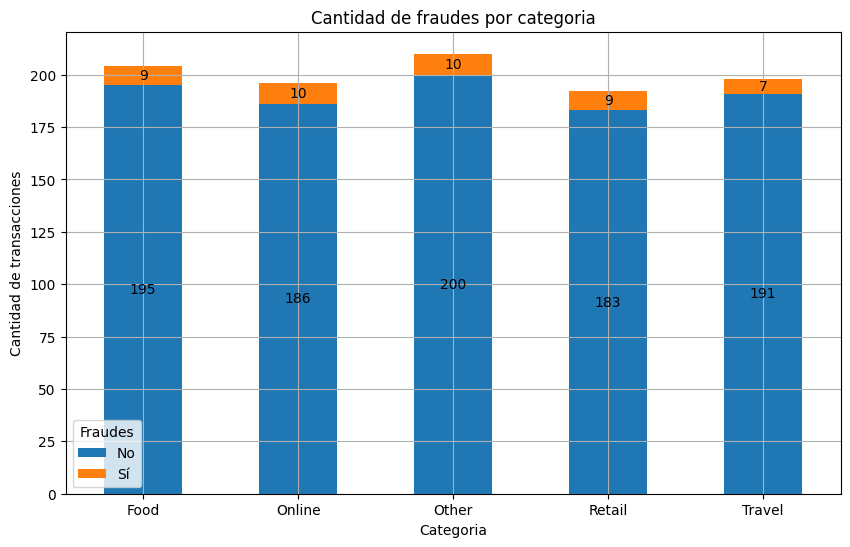

In [17]:
# Se crea un gráfico de barras apiladas que muestra la cantidad de fraudes 
fraude_por_categoria = fraudeCategoria.groupby(['Category', 'FraudIndicator']).size().unstack(fill_value=0)

bars = fraude_por_categoria.plot(kind='bar', stacked=True, figsize=(10, 6))

for container in bars.containers:
    for bar in container:
        height = bar.get_height()
        bottom = bar.get_y()  
        plt.text(bar.get_x() + bar.get_width() / 2, 
                 bottom + height / 2, 
                 f'{int(height)}',
                 ha='center', va='center') 

plt.xlabel('Categoria')
plt.ylabel('Cantidad de transacciones')
plt.title('Cantidad de fraudes por categoria')
plt.legend(title='Fraudes', labels=['No', 'Sí'])
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


### Análisis de Fraudes por Categoría
Se fusionan los DataFrames tran_cat y fraude utilizando 'TransactionID' y se cuenta la cantidad de fraudes por categoría en cantFraudeCategoria

C:\Users\Markitos\AppData\Local\Temp\ipykernel_2864\3129057234.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  paleta = plt.cm.get_cmap('Set3')


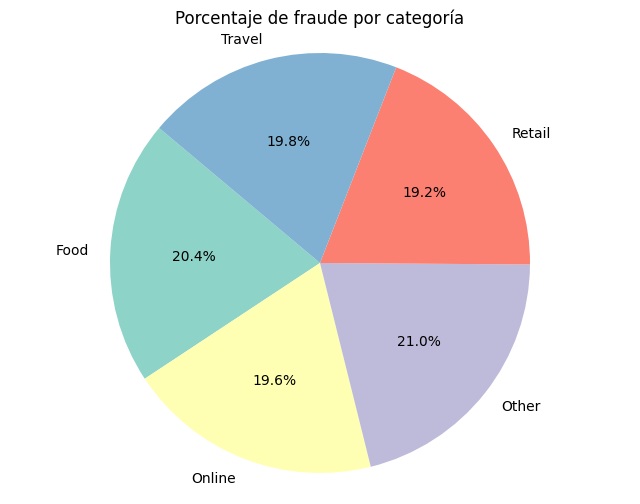

Category
Other     210
Food      204
Travel    198
Online    196
Retail    192
Name: count, dtype: int64

In [18]:
# Se crea un gráfico circular que muestra el porcentaje de cada categoría sobre el total
fraudeCategoria = pd.merge(tran_cat, fraude, on='TransactionID')
cantFraudeCategoria = fraudeCategoria.groupby('Category')['FraudIndicator'].count()
cantFraudeCategoria

# Se crea un gráfico circular que muestra el porcentaje de fraude por categoría.

porcentaje_por_categoria = cantFraudeCategoria * 100
paleta = plt.cm.get_cmap('Set3')
plt.figure(figsize=(8, 6))
plt.pie(porcentaje_por_categoria, labels=porcentaje_por_categoria.index, autopct='%1.1f%%', startangle=140, colors=paleta.colors)
plt.title('Porcentaje de fraude por categoría')
plt.axis('equal')  
plt.show()
totalPorCategoria

### Análisis de Horas con Mayor Frecuencia de Fraude
- Se convierte la marca de tiempo a objetos de fecha y se fusionan los DataFrames fraude y tran_data sobre 'TransactionID'.
- Se extrae la hora de cada transacción y se analiza la frecuencia de fraudes por hora del día.
- Se crea un gráfico de barras que muestra la frecuencia de fraudes por hora del día.


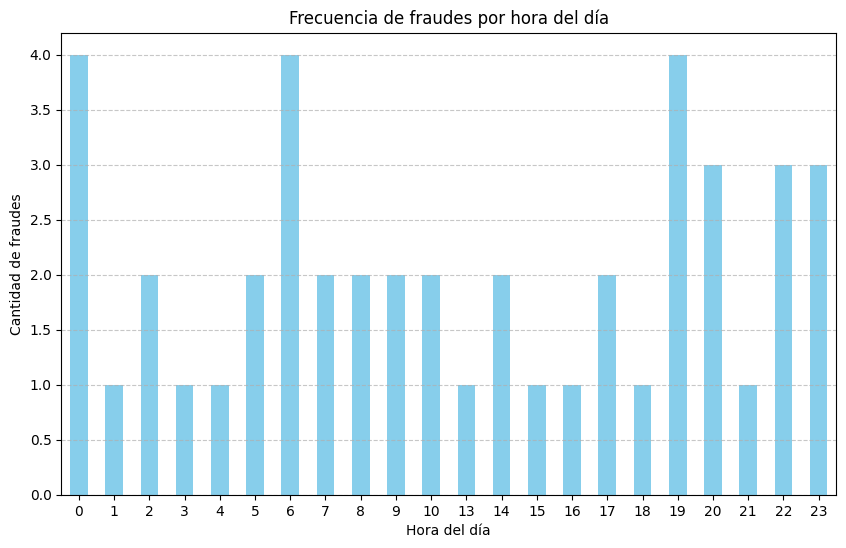

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la marca de tiempo a objetos de fecha
tran_data['Timestamp'] = pd.to_datetime(tran_data['Timestamp'])

# Combinar los datos de fraude con los datos de metadatos de transacciones
merged_data = pd.merge(fraude, tran_data, on='TransactionID', how='inner')

# Extraer la hora de cada transacción
merged_data['Hora'] = merged_data['Timestamp'].dt.hour

# Filtrar las transacciones que son fraudes
transacciones_fraudulentas = merged_data[merged_data['FraudIndicator'] == 1]

# Analizar la frecuencia de fraudes por hora del día
frecuencia_hora = transacciones_fraudulentas.groupby('Hora').size()

# Graficar la frecuencia de fraudes por hora del día
plt.figure(figsize=(10, 6))
frecuencia_hora.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de fraudes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de fraudes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Análisis de Puntuaciones de Anomalía y Fraude:
- Se fusionan los DataFrames anomalia y fraude utilizando 'TransactionID'.
- Se filtran las transacciones fraudulentas y se muestra información sobre las transacciones fraudulentas y sus puntuaciones de anomalía.
- Se crea un histograma que muestra las puntuaciones de anomalía asociadas con fraudes.


     TransactionID  AnomalyScore  FraudIndicator
8                9      0.010471               1
18              19      0.252012               1
48              49      0.006120               1
71              72      0.161773               1
94              95      0.635150               1
118            119      0.852143               1
122            123      0.269506               1
148            149      0.076987               1
159            160      0.799903               1
161            162      0.130345               1
173            174      0.796299               1
198            199      0.354091               1
211            212      0.858186               1
226            227      0.939216               1
239            240      0.572268               1
270            271      0.620899               1
271            272      0.044342               1
288            289      0.757283               1
329            330      0.066511               1
331            332  

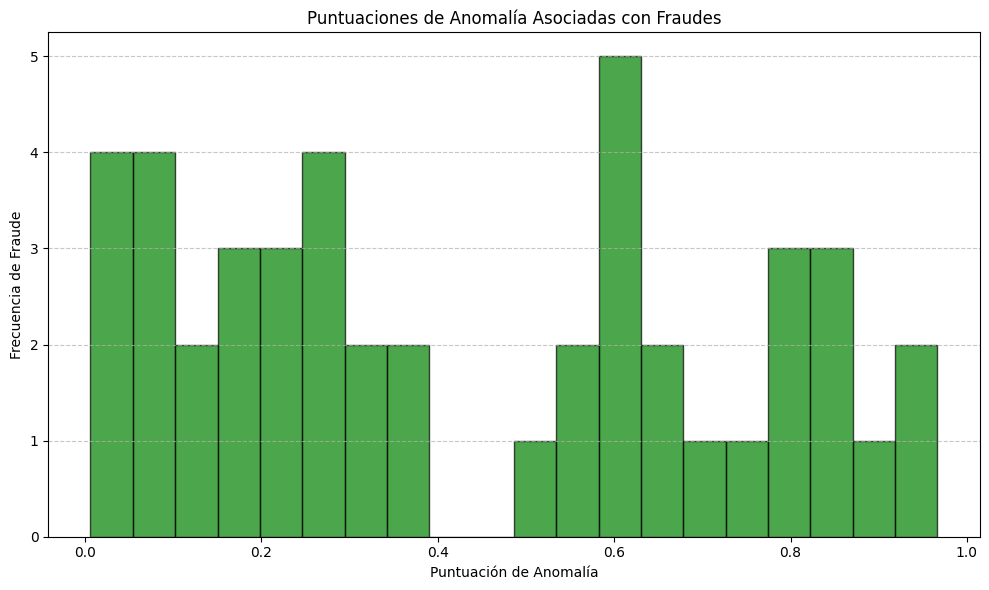

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Fusionar los datos de anomalía y fraude utilizando 'TransactionID'
anomalia_fraude = pd.merge(anomalia, fraude, on='TransactionID', how='inner')

# Filtrar transacciones fraudulentas
transacciones_fraudulentas = anomalia_fraude[anomalia_fraude['FraudIndicator'] == 1]

# Mostrar las transacciones fraudulentas y sus puntuaciones de anomalía
print(transacciones_fraudulentas[['TransactionID', 'AnomalyScore', 'FraudIndicator']])
# Graficar las puntuaciones de anomalía asociadas con fraudes
plt.figure(figsize=(10, 6))
plt.hist(transacciones_fraudulentas['AnomalyScore'], bins=20, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Puntuación de Anomalía')
plt.ylabel('Frecuencia de Fraude')
plt.title('Puntuaciones de Anomalía Asociadas con Fraudes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Mapa de calor: Indicadores de Fraude por Score de Anomalía (Transacciones Fraudulentas

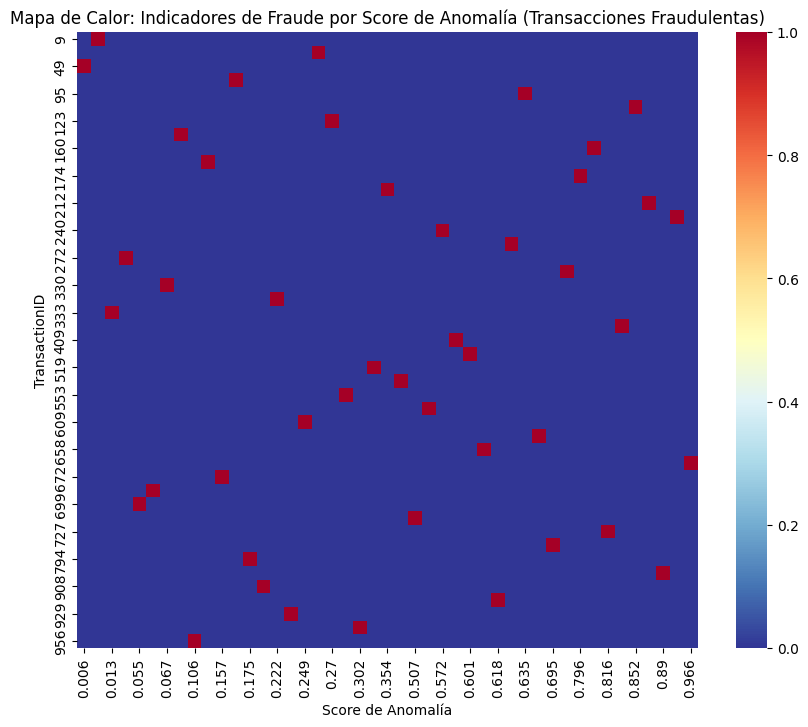

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




transacciones_fraudulentas = fraude[fraude['FraudIndicator'] == 1]

anomalia_fraude = pd.merge(anomalia, transacciones_fraudulentas, on='TransactionID', how='inner')


anomalia_fraude['AnomalyScore'] = anomalia_fraude['AnomalyScore'].round(3)

plt.figure(figsize=(10, 8))
sns.heatmap(anomalia_fraude.pivot_table(index='TransactionID', columns='AnomalyScore', 
                                         values='FraudIndicator', fill_value=0), cmap='RdYlBu_r', alpha=1)
plt.title('Mapa de Calor: Indicadores de Fraude por Score de Anomalía (Transacciones Fraudulentas)')
plt.xlabel('Score de Anomalía')
plt.ylabel('TransactionID')
plt.show()
